## DNN

Deep Neural Network

입력층 → 여러 개의 은닉층(fully connected) → 출력층으로 구성된 일반적인 인공신경망

각 뉴런은 이전 층의 모든 뉴런과 연결됨 (Fully Connected Layer).

주로 벡터 데이터(예: 주가, 키-몸무게, 센서값 등) 처리에 사용된다.

In [37]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [39]:
# 1. Load dataset
digits = datasets.load_digits()
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))  # (n_samples, 64)

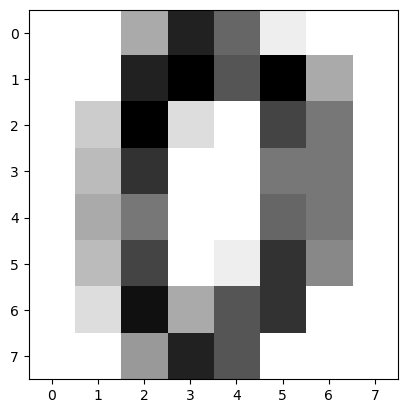

In [41]:
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')

In [43]:
# 2. Train test split
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.2, random_state=42)

In [45]:
# 3. Normalize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [47]:
# 4. PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

In [49]:
# 5. DNN model 정의
class DNN(nn.Module):
    def __init__(self):
        super(DNN, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10)  # 10 classes
        )

    def forward(self, x):
        return self.layers(x)

model = DNN()

In [51]:
# 6. 손실함수 옵티마이저 설정
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [53]:
# 7. 학습
epochs = 20
for epoch in range(epochs):
    optimizer.zero_grad()
    output = model(X_train_tensor)
    loss = criterion(output, y_train_tensor)
    loss.backward()
    optimizer.step()
    
    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

Epoch 1/20, Loss: 2.3123
Epoch 2/20, Loss: 2.2846
Epoch 3/20, Loss: 2.2575
Epoch 4/20, Loss: 2.2305
Epoch 5/20, Loss: 2.2033
Epoch 6/20, Loss: 2.1755
Epoch 7/20, Loss: 2.1470
Epoch 8/20, Loss: 2.1173
Epoch 9/20, Loss: 2.0864
Epoch 10/20, Loss: 2.0540
Epoch 11/20, Loss: 2.0200
Epoch 12/20, Loss: 1.9844
Epoch 13/20, Loss: 1.9472
Epoch 14/20, Loss: 1.9082
Epoch 15/20, Loss: 1.8676
Epoch 16/20, Loss: 1.8252
Epoch 17/20, Loss: 1.7809
Epoch 18/20, Loss: 1.7350
Epoch 19/20, Loss: 1.6875
Epoch 20/20, Loss: 1.6385


In [55]:
# 8. Evaluation
from sklearn.metrics import accuracy_score, f1_score

with torch.no_grad():
    y_pred_tensor = model(X_test_tensor)
    y_pred = torch.argmax(y_pred_tensor, dim=1)

acc = accuracy_score(y_test, y_pred.numpy())

# F1 Score (macro 평균은 클래스 간 균형 고려)
f1 = f1_score(y_test, y_pred.numpy(), average='macro')

print("Evaluation on Test Set")
print(f"Accuracy: {acc:.4f}")
print(f"F1 Score (macro): {f1:.4f}")

Evaluation on Test Set
Accuracy: 0.7722
F1 Score (macro): 0.7398


In [57]:
# 9. 이미지 예측
idx = 10
sample = X_test_tensor[idx].unsqueeze(0)  # Add batch dimension
with torch.no_grad():
    single_pred = torch.argmax(model(sample), dim=1)
print(f"Predicted label for test image {idx}:", single_pred.item())

Predicted label for test image 10: 1


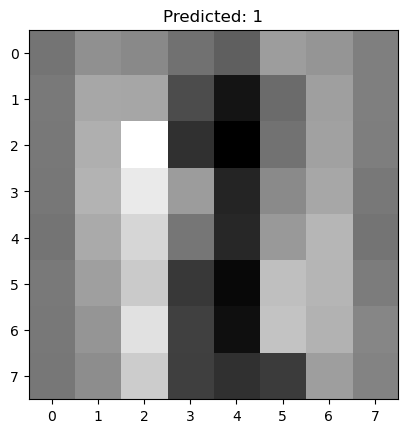

In [59]:
# 10. Show the image
plt.imshow(X_test[idx].reshape(8, 8), cmap=plt.cm.gray_r)
plt.title(f"Predicted: {single_pred.item()}")
plt.show()  